<center>Myranda Swartzwelter <br>
DSC-550 T301 Data Mining<br>
Week 2 Assignment <br>
3/25/2022

1. Using a data set of your choice, write an introduction explaining the data set.

The dataset I'm using is Historical Emissions from https://www.kaggle.com/datasets/ankanhore545/carbon-dioxide-emissions-of-the-world. It shows historical CO2 emissions from countries around the world from 1990-2018. The data was collected by the Climate Watch Data Portal usinng the CAIT data source. One thing to note abour this dataset is that in addition to 193 countries, it has values for 'World' and 'European Unnion (27)'

2. Identify a question or question(s) that you would like to explore in your data set.

I would like to begin to understand which countries emitted the most CO2 and how did that change in 2018, what the U.S. emissions over time look like, and how that compares to other countries. 

In [146]:
#import necessary packages and dataset

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

emissions = pd.read_csv('historical_emissions.csv')
#emissions.head()

In [147]:
# find the largest 5 emitters inn 2018, note that the World and EU are probably in the top 5 of this dataset, so we
# should probably find the top 5 and create a dataframe with those countries

emissions.nlargest(7, '2018')
largest = ['China', 'United States', 'India', 'Indonesia', 'Japan']
five_largest = emissions.loc[emissions['Country'].isin(largest)]

In [152]:
# find the largest 5 emitters inn 2004, note that the World and EU are probably in the top 5 of this dataset, so we
# should probably find the top 5 and create a dataframe with those countries

emissions.nlargest(7, '2004')
largest_early = ['China', 'United States', 'Brazil', 'Japan', 'India']
five_largest_early = emissions.loc[emissions['Country'].isin(largest_early)]


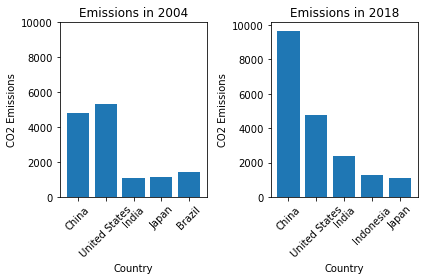

In [156]:
#plot the 5 largest countries with the amount of CO2 they emitted
plt.subplot(1,2,1)  # Create a figure containing a single axes.
plt.bar(five_largest_early['Country'], five_largest_early['2004']);  # Plot some data on the axes.
plt.title('Emissions in 2004')
plt.ylim(0,10000)
plt.ylabel('CO2 Emissions')
plt.xlabel('Country')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees


plt.subplot(1,2,2) 
plt.bar(five_largest['Country'], five_largest['2018']);  # Plot some data on the axes.
plt.title('Emissions in 2018')
plt.ylabel('CO2 Emissions')
plt.xlabel('Country')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees


plt.tight_layout()

From this chart, we can see the shift in emissions from 2004 to 2018 in both amount of emissions and which countries were producing.

In the visualization on the left, we see that the U.S. emits the most CO2, followed by China, India annd Brazil. Both China and the U.S. product over double what India, Japan and Brazil each produce. 

In the visualization on the right we see that China, the Uninted States, India, Indonesia, and Japan emitted the most CO2 in 2018. We can also see that the amount China emitted was almost twice as much as the U.S., which was almost twice as much as India. This chart gives us a good idea of the amounnt each counntry emitted in relation to each other. Based on that, let's look at emissions over time.

When looked at together, we see that while the U.S.'s and Japan's production decreased slightly from 2004 to 2018, China's and India's over doubled. We also see that Brazil drops out of the top 5 producers, and Indoensia climbs to 4th.

In [95]:
years = list(emissions)
years = years[5:20]
years.reverse()
emissions_tf = emissions.transpose()
us_emissions = emissions_tf[2][5:20]
us_emissions = us_emissions.iloc[::-1]

china_emissions = emissions_tf[1][5:20]
china_emissions = china_emissions.iloc[::-1]


Text(0.5, 0, 'Year')

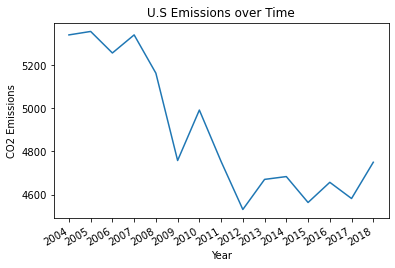

In [122]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(years,us_emissions)# Plot some data on the axes.
fig.autofmt_xdate()
ax.set_title('U.S Emissions over Time')
ax.set_ylabel('CO2 Emissions')
ax.set_xlabel('Year')

To start, I wanted to look at U.S. emissions over the 15 year period from 2014 - 2018.  We can see that the amount of CO2 emitted decreased from 2004 to 2018. In particular we see a sharp declie in 2007, and then again in 2010. I'd be curious to see if this decrease is also reflected in the world and Chinese emissions.

In [97]:
emissions_tf.head(15)
world_emissions = emissions_tf[0][5:20]
world_emissions = world_emissions.iloc[::-1]

Text(0.5, 0, 'Year')

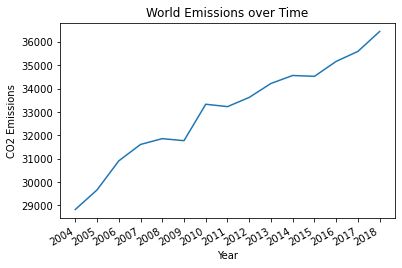

In [123]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(years,world_emissions)
fig.autofmt_xdate()
ax.set_title('World Emissions over Time')
ax.set_ylabel('CO2 Emissions')
ax.set_xlabel('Year')

Here we see world emissions during the same time period from 2004 to 2018. It looks like the trend we saw in U.S. emissions was not global, as emissions increased from 2004 to 2018.

Text(0.5, 0, 'Year')

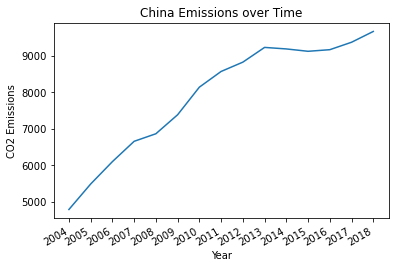

In [124]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(years,china_emissions)# Plot some data on the axes.
fig.autofmt_xdate()
ax.set_title('China Emissions over Time')
ax.set_ylabel('CO2 Emissions')
ax.set_xlabel('Year')

Similar to the World emissions from 2004 to 2018, Chinese emissions incnreased. It's a little difficult to see how these emissions compare though, so I"m going to put them all on the same chart.

Text(0.5, 0, 'Year')

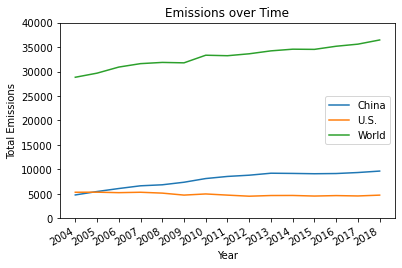

In [127]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(years,china_emissions, label= 'China') # Plot some data on the axes.
ax.plot(years,us_emissions, label='U.S.')
ax.plot(years,world_emissions, label = 'World')
ax.set_ylim(0, 40000)
plt.legend()
fig.autofmt_xdate()
ax.set_title('Emissions over Time')
ax.set_ylabel('Total Emissions')
ax.set_xlabel('Year')

This chart compares World, Chinese, and U.S. emissions from 2004 to 2018. We can see the slight decline in emissionns from the U.S. and the jump in emissions from China in this period. We can see that China accounts for about a quarter of World Emissions and the U.S. about an 8th by 2018. It's obvious that the U.S. and China account for much of World emissionns compared to the other 191 countries, but it's interesting to remember that this is not by population or land area, and so proportionally they may not be using more CO2 / person or more CO2/ square mile than other countries.

In [113]:
emissions_years_only = emissions[['Country', '2018','2017','2016','2015','2014']]
emissions_years_only = emissions_years_only[emissions_years_only['Country']!='World']
emissions_years_only = emissions_years_only[emissions_years_only['Country']!='European Union (27)']

average_emissions = []
for (columnName, columnData) in emissions_years_only.iteritems():
    if columnName != 'Country':
        average_emissions.append(columnData.values.mean())
average_emissions.reverse()
years_short = years[-5:]
us_emissions_short = us_emissions[-5:]


Text(0.5, 0, 'Year')

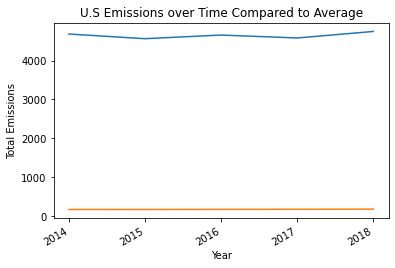

In [114]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(years_short,us_emissions_short, label='U.S')# Plot some data on the axes.
ax.plot(years_short,average_emissions, label = 'Average')# Plot some data on the axes.
fig.autofmt_xdate()
ax.set_title('U.S Emissions over Time Compared to Average')
ax.set_ylabel('Total Emissions')
ax.set_xlabel('Year')

The other question I wanted to address was how the U.S. missions over the 2014-2018 period compared to the average of all countries' emissions over the same period. However, if you look at the average emissions of all countries, it's very low compared to the U.S. so it's hard to say anything. After viewing this graph, I wanted to look at U.S. emissions compared to the average of the largest 5 emitters.

Text(0.5, 0, 'Year')

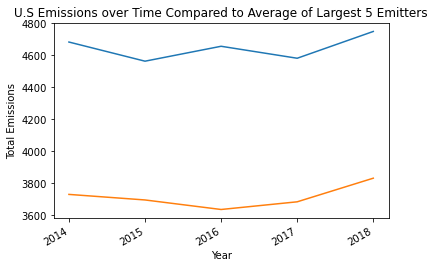

In [115]:
emissions_years_only = emissions_years_only.loc[emissions['Country'].isin(largest)]

average_emissions_largest = []
for (columnName, columnData) in emissions_years_only.iteritems():
    if columnName != 'Country':
        average_emissions_largest.append(columnData.values.mean())
average_emissions_largest.reverse()

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(years_short,us_emissions_short)# Plot some data on the axes.
ax.plot(years_short,average_emissions_largest)# Plot some data on the axes.
fig.autofmt_xdate()
ax.set_title('U.S Emissions over Time Compared to Average of Largest 5 Emitters')
ax.set_ylabel('Total Emissions')
ax.set_xlabel('Year')

Looking at this visualization, we can see that the U.S. is consistently above average when compared to the largest 5 emitters for the period 2014-2018, despite decreasing their emissions on a 20 year scale.

These visualizations help us begin to explore historical CO2 emissions. In particular they show,
1. The five largest CO2 emitters in 2004 were China, the U.S, India, Brazil, and Japan. The five largest CO2 emitters in 2018 were China, the U.S, India, Indonesia, and Japan. There was a slight shift in the make up of the top 5 producers, and notably China's production over doubled from 2004 to 2018.
2. When looking at U.S. CO2 emissions over time, we see a decrease from 2004 to 2018, and in particular a sharp decrease from 2007-2009, a slight increase, and then a sharp decline from 2010-2012.
3. Chinese CO2 emissions increased steadily from 2004-2013, evened out and then incnreased again.
4. World CO2 emissions have increased by about 20% between 2004 and 2018.
5. The U.S. emissions from 2014 to 2018 is significantly above the average country's CO2 emissions in the same time period.
6. The U.S. emissions from 2014 to 2018 is consistently about 25% above the average emissions of the 5 largest emitters in the same time period.